<a href="https://colab.research.google.com/github/suhyun6363/what_your_personal_color/blob/sibal/sibal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy matplotlib scikit-learn
!pip install imageio
!pip install numpy matplotlib
!pip install colormath

  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=61243658a0ff2211fb81926c3dc8d695ddc0cd65a3e002a0e8e19c2f1e67ec18
  Stored in directory: /root/.cache/pip/wheels/ab/b3/4d/c0738759c25a1df01958068f162cf2a9dc3ab1da8b972cfcfc
Successfully built colormath


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler
import imageio


#  이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)



<ipython-input-5-bd3bbefed738>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [234.86050791 214.36853147 211.40228193]
Cluster 2 Center (RGB): [177.79460483 150.56239154 140.97397066]
Cluster 3 Center (RGB): [207.87939538 182.93082688 172.59815538]
Cluster 4 Center (RGB): [98.44396887 78.60622568 76.05914397]
Cluster 5 Center (RGB): [224.03801899 201.13867879 194.91181204]
Cluster 1 Size: 27170 pixels
Cluster 5 Size: 24858 pixels
Cluster 3 Size: 15615 pixels
Cluster 2 Size: 6340 pixels
Cluster 4 Size: 2565 pixels
전체 픽셀 수: 76548
평균 RGB 값: [216.54465707 193.82549081 187.7632949 ]


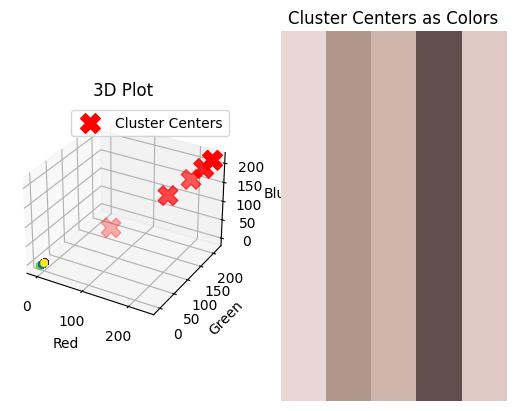

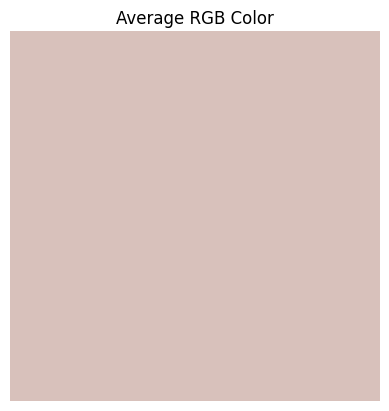

In [6]:
# 가중평균계산
from collections import Counter

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 5
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')

# 각 클러스터에 속하는 픽셀 수와 중심값(RGB)의 가중 평균 계산
weighted_sum = np.zeros(3)  # 초기화: R, G, B의 가중 합
for i in range(optimal_k):
    cluster_size = cluster_sizes[i]
    cluster_center_rgb = cluster_centers_rgb[i]
    weighted_sum += cluster_center_rgb * cluster_size

# 평균 RGB 계산
average_rgb = weighted_sum / total_pixels

# 출력
print(f'평균 RGB 값: {average_rgb}')

# 평균 RGB 값을 사용하여 이미지 생성
average_rgb_image = np.full((100, 100, 3), average_rgb, dtype=np.uint8)


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()

# 이미지 표시
plt.imshow(average_rgb_image)
plt.axis('off')
plt.title('Average RGB Color')
plt.show()

# color distance
# z-score
# 정규화


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [234.86050791 214.36853147 211.40228193]
Cluster 2 Center (RGB): [177.79460483 150.56239154 140.97397066]
Cluster 3 Center (RGB): [207.87939538 182.93082688 172.59815538]
Cluster 4 Center (RGB): [98.44396887 78.60622568 76.05914397]
Cluster 5 Center (RGB): [224.03801899 201.13867879 194.91181204]
Cluster 1 Size: 27170 pixels
Cluster 5 Size: 24858 pixels
Cluster 3 Size: 15615 pixels
Cluster 2 Size: 6340 pixels
Cluster 4 Size: 2565 pixels
전체 픽셀 수: 76548


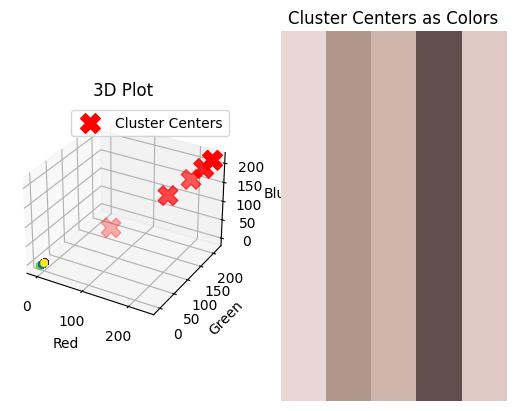

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import StandardScaler
import imageio


#  이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)



from collections import Counter

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 5
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()


# color distance
# z-score
# 정규화


<ipython-input-35-de34ab2d0973>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_image = imageio.imread(image_path)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Center (RGB): [234.86050791 214.36853147 211.40228193]
Cluster 2 Center (RGB): [177.79460483 150.56239154 140.97397066]
Cluster 3 Center (RGB): [207.87939538 182.93082688 172.59815538]
Cluster 4 Center (RGB): [98.44396887 78.60622568 76.05914397]
Cluster 5 Center (RGB): [224.03801899 201.13867879 194.91181204]
Cluster 1 Size: 27170 pixels
Cluster 5 Size: 24858 pixels
Cluster 3 Size: 15615 pixels
Cluster 2 Size: 6340 pixels
Cluster 4 Size: 2565 pixels
전체 픽셀 수: 76548


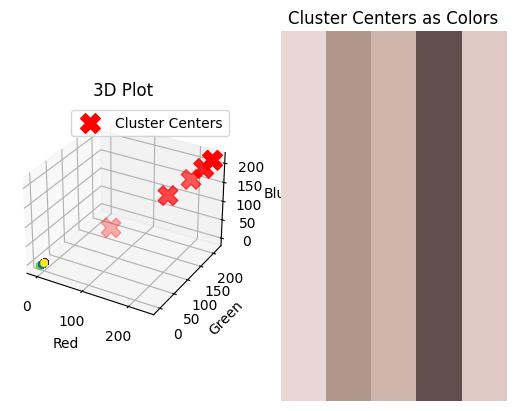

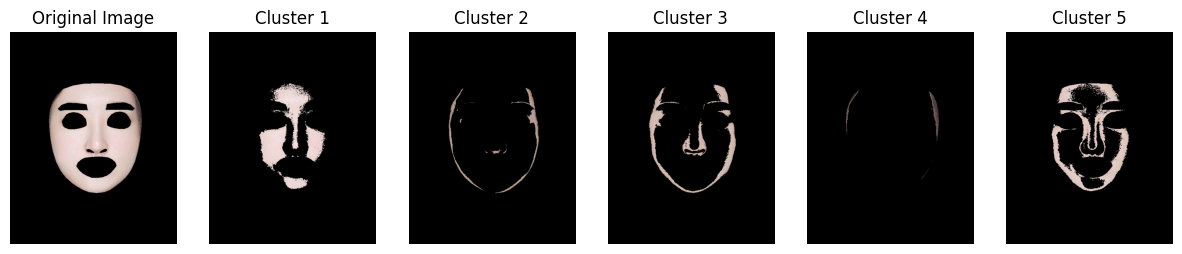

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import imageio

# 이미지 로드
image_path = "/content/facemesh.png"
face_image = imageio.imread(image_path)

# [0, 0, 0]인 픽셀 제거
non_black_pixels = face_image[~np.all(face_image == [0, 0, 0], axis=-1)]

# 이미지를 2D 배열로 변환
face_data = non_black_pixels.reshape((-1, 3))

# 표준화 (Standardization) - 평균이 0, 표준편차가 1이 되도록 스케일 조정
scaler = StandardScaler()
face_data_scaled = scaler.fit_transform(face_data)

# 최적의 k 값으로 k-means 클러스터링 수행
optimal_k = 5
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_cluster_labels = optimal_kmeans.fit_predict(face_data_scaled)

# 클러스터 중심값(RGB 형식) 출력
cluster_centers_rgb = scaler.inverse_transform(optimal_kmeans.cluster_centers_)

for i, center in enumerate(cluster_centers_rgb):
    print(f'Cluster {i + 1} Center (RGB): {center}')

# 각 클러스터에 속하는 픽셀 수 계산
cluster_sizes = Counter(optimal_cluster_labels)

for i, size in cluster_sizes.items():
    print(f'Cluster {i + 1} Size: {size} pixels')

total_pixels = sum(cluster_sizes.values())

# 출력 전체 픽셀 수
print(f'전체 픽셀 수: {total_pixels}')


# 클러스터 결과 시각화 (이 예시에서는 3D 플로팅)
fig = plt.figure()

# 3D 플로팅
ax = fig.add_subplot(121, projection='3d')
ax.scatter(face_data_scaled[:, 0], face_data_scaled[:, 1], face_data_scaled[:, 2], c=optimal_cluster_labels)
ax.scatter(cluster_centers_rgb[:, 0], cluster_centers_rgb[:, 1], cluster_centers_rgb[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
ax.set_title('3D Plot')

# 색상으로 표현
cluster_centers_image = cluster_centers_rgb.reshape((1, optimal_k, 3))
cluster_centers_image = cluster_centers_image.astype(np.uint8)
ax2 = fig.add_subplot(122)
ax2.imshow(cluster_centers_image, aspect='auto')
ax2.axis('off')
ax2.set_title('Cluster Centers as Colors')

plt.show()


# 각 클러스터에 해당하는 이미지 생성 및 출력
fig, axes = plt.subplots(1, optimal_k + 1, figsize=(15, 3))

# 원본 이미지
axes[0].imshow(face_image)
axes[0].axis('off')
axes[0].set_title('Original Image')


for i in range(optimal_k):
    cluster_indices = np.where(optimal_cluster_labels == i)
    cluster_pixels = face_data[cluster_indices]
    cluster_image = np.zeros_like(face_data)
    cluster_image[cluster_indices] = cluster_pixels

    # 이미지 재구성
    cluster_image_reshaped = cluster_image.reshape(non_black_pixels.shape)
    result_image = np.zeros_like(face_image)
    result_image[~np.all(face_image == [0, 0, 0], axis=-1)] = cluster_image_reshaped

    axes[i + 1].imshow(result_image)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f'Cluster {i + 1}')

plt.show()

#교수님스미마셍
#출력결과 클러스터순서대로네요
